## K-Nearest Neighbor Classification 

In [1]:
import numpy as np
from sklearn import datasets, neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

## Step-1: Loading Data

In [2]:
iris = load_iris()
X = iris.data[:, :2]
Y = iris.target

## Step-2: Splitting Data

In [3]:
samples = len(Y)

indices = np.random.permutation(samples)

training_samples = int(samples * 0.75)

#Training set
x_train = X[indices[ : training_samples]]
y_train = Y[indices[ : training_samples]]

#Test set
x_test = X[indices[training_samples : ]]
y_test = Y[indices[training_samples : ]]

## Step-3: Visualize

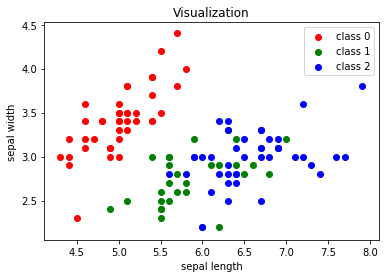

In [42]:
X_class0 = np.asmatrix([ x_train[i] for i in range(len(x_train)) if y_train[i]==0 ])
Y_class0 = np.zeros((X_class0.shape[0]), dtype=np.int)

X_class1 = np.asmatrix([ x_train[i] for i in range(len(x_train)) if y_train[i]==1 ])
Y_class1 = np.ones((X_class1.shape[0]), dtype=np.int)

X_class2 = np.asmatrix([x_train[i] for i in range(len(x_train)) if y_train[i]==2])
Y_class2 = np.full((X_class2.shape[0]), fill_value=2, dtype=np.int)

plt.scatter([X_class0[:, 0]], [X_class0[:, 1]], color='red')
plt.scatter([X_class1[:, 0]], [X_class1[:, 1]], color='green')
plt.scatter([X_class2[:,0]], [X_class2[:,1]], color='blue')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend(['class 0', 'class 1', 'class 2'])
plt.title('Visualization')
plt.show()

## Step-4: Model Fitting

In [5]:
model = neighbors.KNeighborsClassifier(n_neighbors = 5)
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

## Step-5: Visualize Algorithm

In [24]:
point = np.array([5.9,2.9])
true_point = 1
predicted_class = model.predict([point])
neighbors_object = neighbors.NearestNeighbors(n_neighbors=5)
neighbors_object.fit(x_train)
nn_distances, nn_point_indices = neighbors_object.kneighbors([point])
nn_point = x_train[nn_point_indices[0]]

In [25]:
print("The query point is: {}\n".format(point))
print("The nearest neighbors of the query point are:\n {}\n".format(nn_point))
print("The classes of the nearest neighbors are: {}\n".format(y_train[nn_point_indices[0]]))
print("Predicted class for query point: {}".format(predicted_class[0]))

The query point is: [5.9 2.9]

The nearest neighbors of the query point are:
 [[5.9 3. ]
 [5.9 3. ]
 [6.  3. ]
 [5.8 2.8]
 [6.1 2.9]]

The classes of the nearest neighbors are: [1 2 2 2 1]

Predicted class for query point: 2


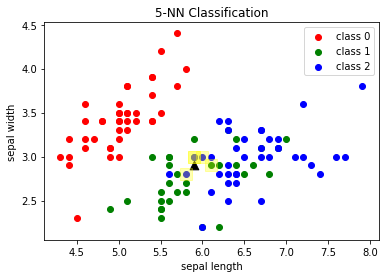

In [44]:
plt.scatter([X_class0[:, 0]], [X_class0[:, 1]], color='red')
plt.scatter([X_class1[:, 0]], [X_class1[:, 1]], color='green')
plt.scatter([X_class2[:, 0]], [X_class2[:, 1]], color='blue')
plt.scatter([point[0]], [point[1]], marker='^', s=75, color='black')
plt.scatter([nn_point[:, 0]], [nn_point[:, 1]], marker='s',s=150, color='yellow', alpha=0.30)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend(['class 0','class 1','class 2'])
plt.title('5-NN Classification')
plt.show()

## Step-6: Evaluation

In [45]:
def evaluation(model, x_test, y_test):
    
    predictions = [model.predict(x_test[i].reshape( (1, len(x_test[i]))))[0] for i in range(x_test.shape[0])]
    percentage = 0
    for i in range(len(predictions)):
        if predictions[i] != y_test[i]:
            percentage += 1
    percentage *= 100/len(y_test)
    
    return percentage

In [46]:
print('Misclassification Percentage = {}%'.format(evaluation(model, x_test, y_test)))

Misclassification Percentage = 36.8421052631579%
